# Лабораторная работа 1

### Библиотеки

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
import scipy.fftpack

### Переменные и функции

In [2]:
T = 2#int(input("Введите T: "))
A = 2
N = 10#int(input("Введите N: "))
w=2*np.pi/T
t0=0
ancof=[]

In [3]:
def pr(x): 
    return np.sign(math.tan(np.pi*x/T))*A

def foran(t, n):
    return pr(t)*math.cos(n*w*t)

def forbn(t, n):
    return pr(t)*math.sin(n*w*t)

def fan(n):
    v, err = quad(foran, t0, T, args=(n)) 
    ancof.append(v*math.cos(n*w*t))
    return v

def fbn(n):
    v, err = quad(forbn, t0, T,args=(n))
    return v

### 1
а) напишите программу, которая выведет на экран аппроксимированную функцию x(t)*

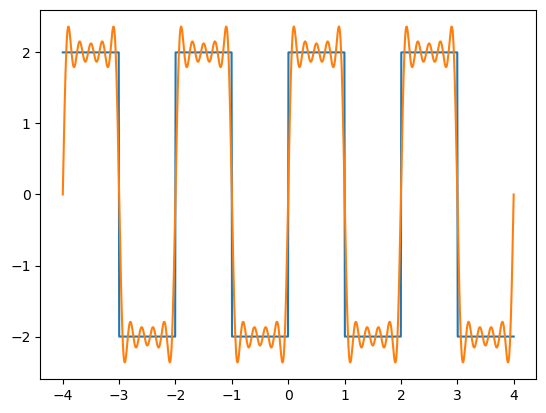

In [4]:
x = np.linspace(-4,4,1000)
ylab1 = np.array([pr(a) for a in x])
plt.plot(x,ylab1)

v, err = quad(pr, t0, T)
a0 = (2/T) * v

answlab1 =[]
for t in (x):
    su= [(fan(n)*math.cos(n*w*t)+fbn(n)*math.sin(n*w*t)) for n in range(N)]
    answlab1.append(np.sum(su)+a0/2)

plt.plot(x, answlab1)
plt.show()

б) постройте график погрешности приближения x(t) функцией x(t)*.

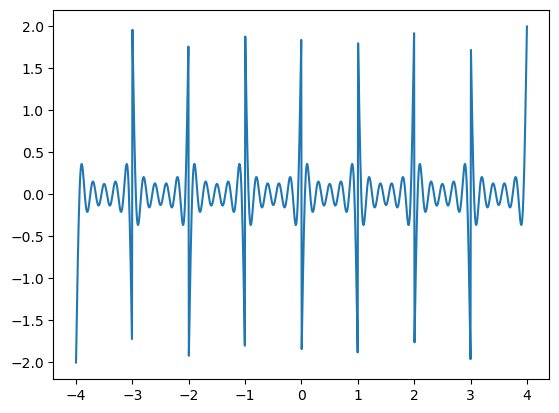

In [5]:
diflab1 = np.linspace(-4,4,1000)
for i in range(len(diflab1)):
    diflab1[i] = answlab1[i] - ylab1[i]

plt.plot(x, diflab1)
plt.show()

### 2
Убедиться в правильности работы алгоритма, который был разработан Вами в пункте 1 данной
лабораторной работы. Для этого подать на вход программы вместо прямоугольного импульса сигнал
косинуса x(t)=Acos(wt) с частотой равной f=100 Гц, где A – заданная амплитуда сигнала.

In [6]:
w=2*np.pi*100

def rect_signal(x, T=2):
    x %= T
    if x > T/2:
        return -2
    else:
        return 2
    
rect = np.vectorize(rect_signal)

def for_cos(t):
    return A*math.cos(w*t)

def foran2(t, n):
    return for_cos(t)*math.cos(n*w*t)

def forbn2(t, n):
    return for_cos(t)*math.sin(n*w*t)

def fan2(n):
    v, err = quad(foran2, t0, T, args=(n)) 
    return v

def fbn2(n):
    v, err = quad(forbn2, t0, T,args=(n))
    return v

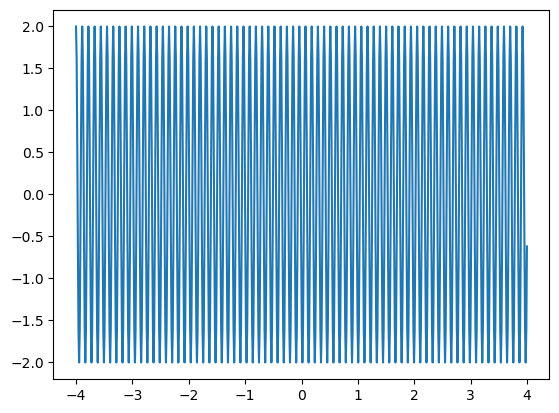

D:\conda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


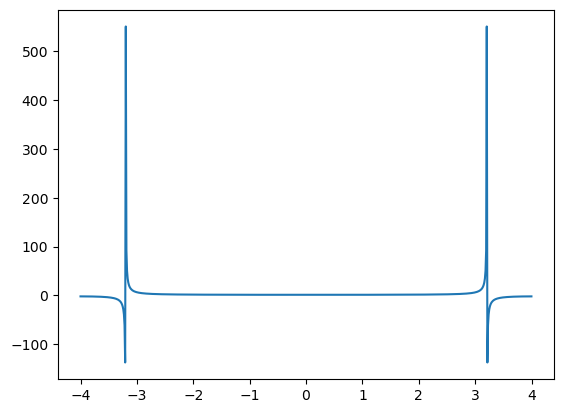

In [7]:
x = np.arange(-4,4,0.011)
fory_cos = np.vectorize(for_cos)
ylab2 = fory_cos(x)

plt.plot(x,ylab2)
plt.show()

fyrielab2 = np.fft.fft(ylab2)

plt.plot(x, fyrielab2)
plt.show()

Определить спектр прямоугольного сигнала с помощью встроенной функции fft и сопоставить
определенный спектр с тем, который предсказывает ваш алгоритм.

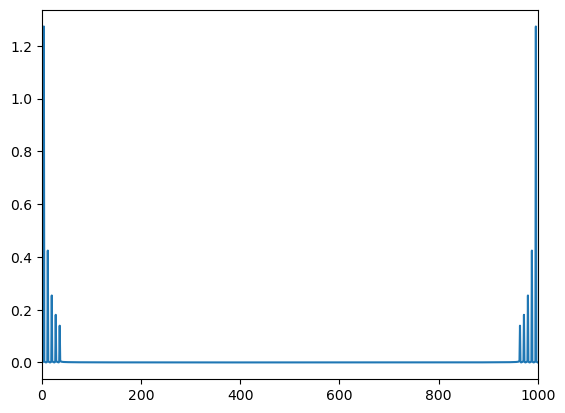

In [8]:
# спектры для прямоугольного сигнала
x = np.fft.fft(answlab1)

plt.plot(abs(x)/1000)
plt.xlim(0,1000)
plt.show()

Добавить к сигналу шум, посмотреть как шум будет изменять спектр сигнала.

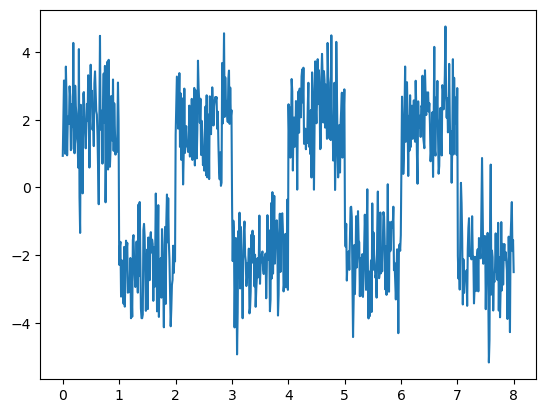

In [9]:
def pr(x): 
    return np.sign(math.tan(np.pi*x/T))*A

T = 2
_x = np.arange(0,8,0.011)
x = np.arange(0,8,0.011)
_cos = np.vectorize(pr)

y = _cos(x) + np.random.normal(0, 1, x.shape)

plt.plot(x,y)
plt.show()

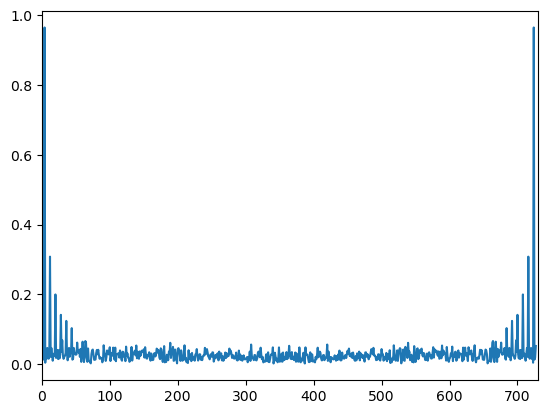

In [10]:
x = np.fft.fft(y)/1000

plt.plot(abs(x))
plt.xlim(0,730)
plt.show()

# Лабораторная работа 2

Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Сравните время вычисления этих двух функций.

In [11]:
A = 1

def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


def func_cos(x, f1, f2):  
    return A * math.cos((2 * f1 * math.pi) * x) + A * math.cos((2 * f2 * math.pi) * x)

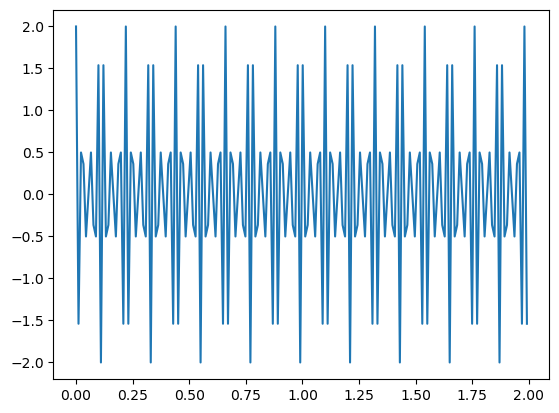

In [12]:
x = np.arange(0,2,0.011)
_cos = np.vectorize(func_cos)

cos = _cos(x, 50, 150)
y = cos
plt.plot(x, y)
y = np.fft.fft(cos)

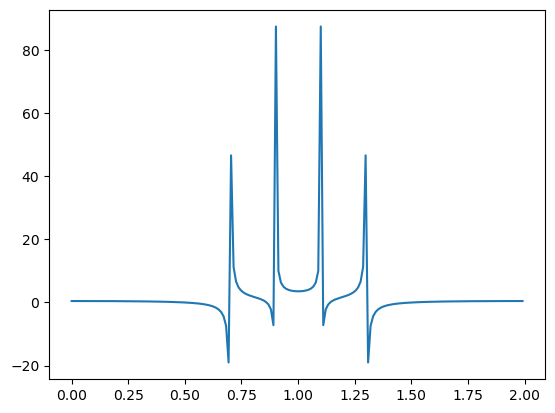

In [13]:
yfft = np.fft.fft(cos)
plt.plot(x, yfft)

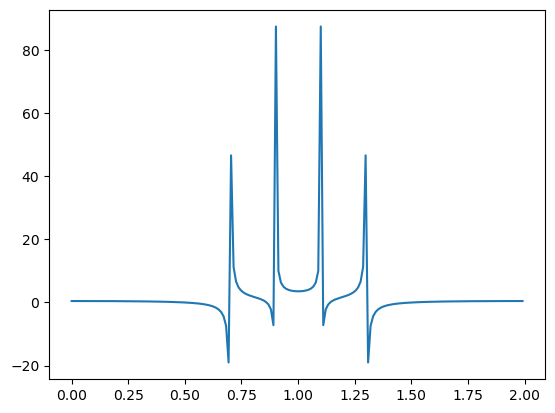

In [14]:
yslow = DFT_slow(cos)
plt.plot(x, yslow) 
plt.show()

In [15]:
%timeit DFT_slow(cos)
%timeit np.fft.fft(cos)

6.92 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.2 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


С помощью функций быстрого обратного преобразования Фурье ifft() убедитесь, что форма сигнала не изменилась

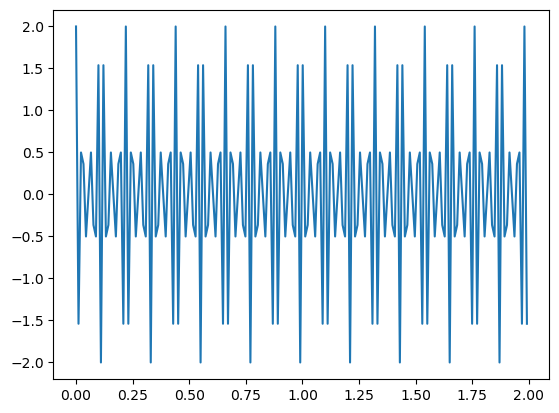

In [16]:
yco = np.fft.ifft(yslow)
plt.plot(x, yco)
plt.show()

После распространения сигнала в линии на приемнике был получен сигнал, искаженный белым шумом. Постройте дискретный спектр зашумленного  сигнала на приемнике. Возьмите обратное преобразование Фурье и посмотрите, как поменялась форма принятого сигнала после распространения в линии

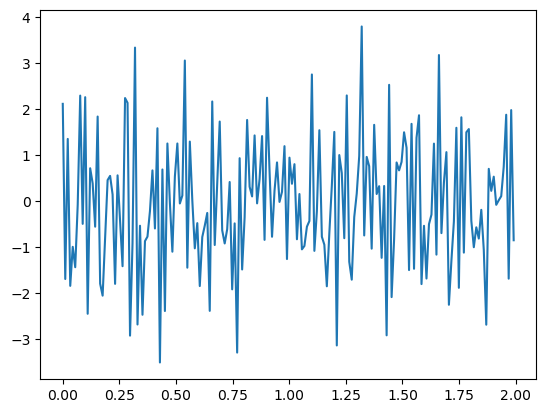

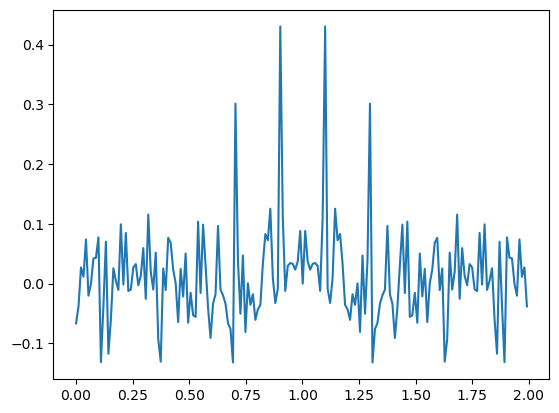

In [17]:
added = cos + np.random.normal(0, 1, 182)
y = added
plt.plot(x, y)
plt.show()

y = np.fft.ifft(y)
plt.plot(x, y)
plt.show()

## 2
Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Наложите шум на данный сигнал, посмотрите спектр зашумленного сигнала.

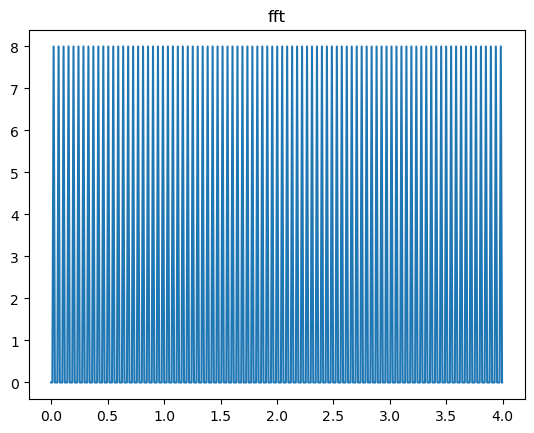

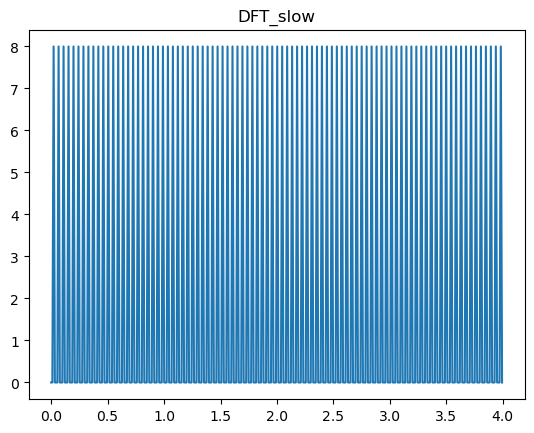

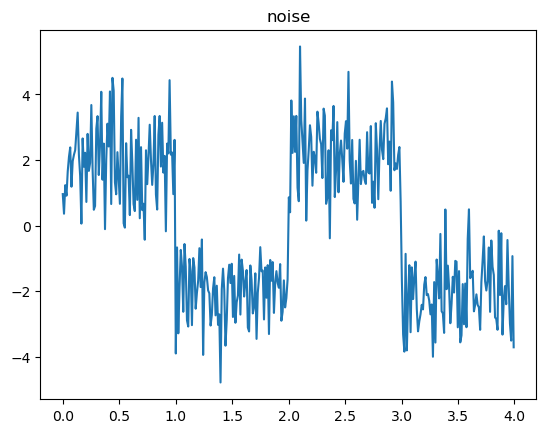

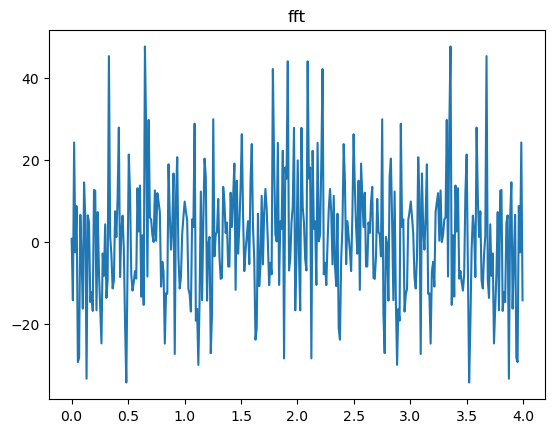

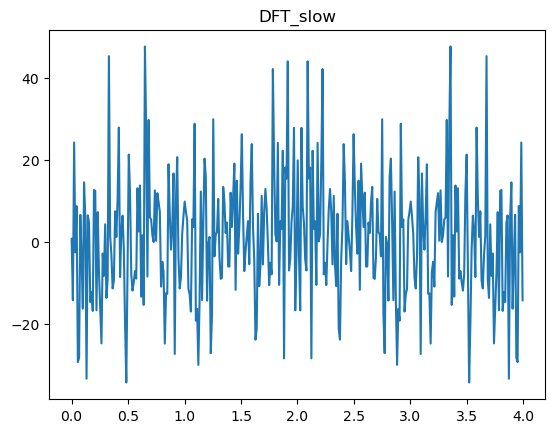

In [18]:
T=2
A=2

def rect_signal(x):
    x %= T
    if x > T/A:
        return -A
    else:
        return A

x = np.arange(0,4,0.011)
rect = np.vectorize(rect_signal)


plt.title("fft")
yfft = np.fft.fft(rect(x))
plt.plot(x, yfft)
plt.show()

plt.title("DFT_slow")
yslow = DFT_slow(rect(x))
plt.plot(x, yslow)
plt.show()

plt.title("noise")
ynoise = rect(x) + np.random.normal(0, 1, 364)
plt.plot(x, ynoise)
plt.show()

plt.title("fft")
yfftno = np.fft.fft(ynoise)
plt.plot(x, yfftno)
plt.show()

plt.title("DFT_slow")
yslowno = DFT_slow(ynoise)
plt.plot(x, yslowno) 
plt.show()

3 Реализовать код для определения быстрого дискретного преобразования Фурье (БДПФ). Убедиться, что функция написано верно, для этого рассмотреть сигнал косинуса с частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц. Сравните время выполнения написанного кода для реализации (БДПФ) с встроенной функцией (БДПФ) fft()

In [19]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
import scipy.fftpack

In [20]:
x = np.arange(0,4,0.011)
N = x.shape[0]
w = 2 * 50 * np.pi 
A = 1

def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                                X_even + factor[N // 2:] * X_odd])


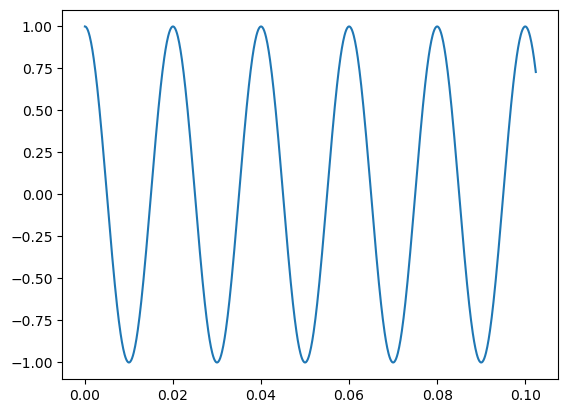

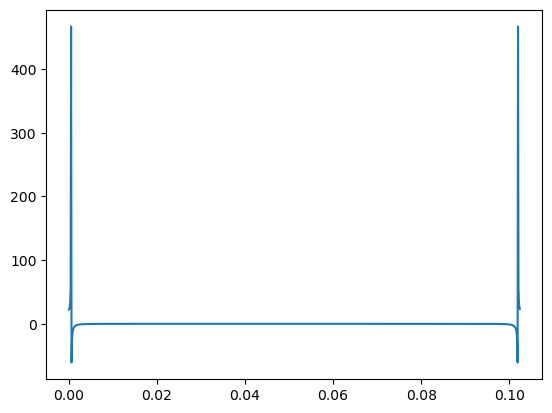

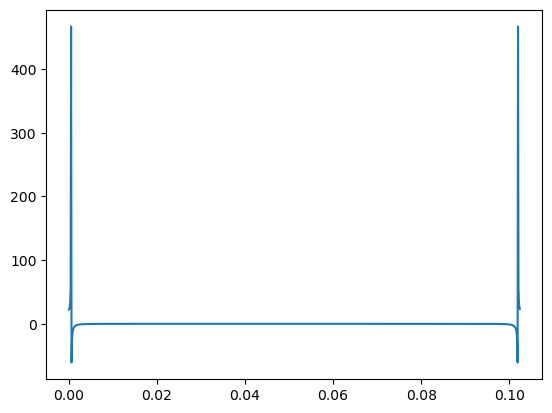

9.65 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1.16 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
T = 1/10000
N = 1024
x = np.linspace(0, T*N, N)

cos = np.vectorize(for_cos)

plt.plot(x, cos(x))
plt.show()

plt.plot(x, np.fft.fft(cos(x)))
plt.show()

plt.plot(x, FFT(cos(x)))
plt.show()

%timeit FFT(cos(x))
%timeit np.fft.fft(cos(x))